# Weather Data Analysis 

### Let's import flow data.csv file and see what information it contains 

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
#

In [12]:
flow_data = pd.read_csv('flow data.csv')
flow_data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'flow data.csv'

### It looks like first row of the csv changes the structure of the dataframe (Daily Discharge (m3/s) (PARAM = 1) and Daily Water Level (m) (PARAM = 2)). Hence, we should drop it when downloading. 

In [13]:
flow_data = pd.read_csv('flow data.csv', skiprows=1)


FileNotFoundError: [Errno 2] No such file or directory: 'flow data.csv'

In [188]:
flow_data.head(5)

,ID,PARAM,Date,Value,SYM
0,02HC027,1,1966/07/04,0.357,NaN
1,02HC027,1,1966/07/05,0.249,NaN
2,02HC027,1,1966/07/06,0.275,NaN
3,02HC027,1,1966/07/07,0.337,NaN
4,02HC027,1,1966/07/08,0.252,NaN


### Now we will create two new dataframes each for daily discharge and for daily water level and merge them 

In [189]:
# Create separate DataFrames for PARAM = 1 and PARAM = 2 
param_1_data = flow_data[flow_data["PARAM"] == 1][["ID", "Date", "Value"]].rename(columns={"Value": "daily_discharge"})
param_2_data = flow_data[flow_data["PARAM"] == 2][["ID", "Date", "Value"]].rename(columns={"Value": "water_level"})

# Merge the two DataFrames on ID and Date
flow_data_merged = pd.merge(param_1_data, param_2_data, on=["ID", "Date"], how="outer")

# Verify the merged DataFrame
print(flow_data_merged)


            ID        Date  daily_discharge  water_level
0      02HC027  1966/07/04            0.357          NaN
1      02HC027  1966/07/05            0.249          NaN
2      02HC027  1966/07/06            0.275          NaN
3      02HC027  1966/07/07            0.337          NaN
4      02HC027  1966/07/08            0.252          NaN
...        ...         ...              ...          ...
43002  02HC024  2022/12/27            2.280       12.141
43003  02HC024  2022/12/28            2.150       12.134
43004  02HC024  2022/12/29            2.490       12.151
43005  02HC024  2022/12/30            4.920       12.249
43006  02HC024  2022/12/31           26.400       12.767

[43007 rows x 4 columns]


In [190]:
flow_data_merged.describe()

,daily_discharge,water_level
count,43007.000000,15623.000000
mean,2.504642,6.147701
std,4.108611,5.907381
min,0.042000,0.199000
25%,0.370000,0.341000
50%,1.550000,0.855000
75%,2.700000,12.166000
max,108.000000,13.541000


In [191]:
# Convert the 'Date' column to datetime format
flow_data_merged["Date"] = pd.to_datetime(flow_data_merged["Date"])
flow_data_merged = flow_data_merged.sort_values(by="Date").reset_index(drop=True)


# Verify the changes
print(flow_data_merged.info())  # Confirm that the 'Date' column is now datetime
print(flow_data_merged.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43007 entries, 0 to 43006
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               43007 non-null  object        
 1   Date             43007 non-null  datetime64[ns]
 2   daily_discharge  43007 non-null  float64       
 3   water_level      15623 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.3+ MB
None
        ID       Date  daily_discharge  water_level
0  02HC024 1962-10-01             2.15          NaN
1  02HC024 1962-10-02             1.98          NaN
2  02HC024 1962-10-03             1.87          NaN
3  02HC024 1962-10-04             1.87          NaN
4  02HC024 1962-10-05             6.37          NaN


In [192]:
# Filter rows where water_level is not null
water_level_available = flow_data_merged[flow_data_merged["water_level"].notnull()]

# Find the minimum and maximum dates
min_date = water_level_available["Date"].min()
max_date = water_level_available["Date"].max()

# Print the range
print(f"Water level is available from {min_date} to {max_date}.")

Water level is available from 2002-01-01 00:00:00 to 2023-12-31 00:00:00.


In [193]:
start_date = "2002-01-01"
end_date = "2023-12-31"

# Filter the DataFrame to only include rows within the specified range
flow_data_merged = flow_data_merged[(flow_data_merged["Date"] >= start_date) & (flow_data_merged["Date"] <= end_date)]
flow_data_merged = flow_data_merged.sort_values(by="Date").reset_index(drop=True)

# Verify the filtered DataFrame
print(flow_data_merged)

            ID       Date  daily_discharge  water_level
0      02HC024 2002-01-01            1.560       12.114
1      02HC027 2002-01-01            0.193        0.263
2      02HC024 2002-01-02            1.490       12.108
3      02HC027 2002-01-02            0.186        0.305
4      02HC027 2002-01-03            0.185        0.252
...        ...        ...              ...          ...
15700  02HC027 2023-12-27            3.790        0.693
15701  02HC027 2023-12-28            1.830        0.680
15702  02HC027 2023-12-29            1.850        0.622
15703  02HC027 2023-12-30            1.310        0.575
15704  02HC027 2023-12-31            0.630        0.401

[15705 rows x 4 columns]


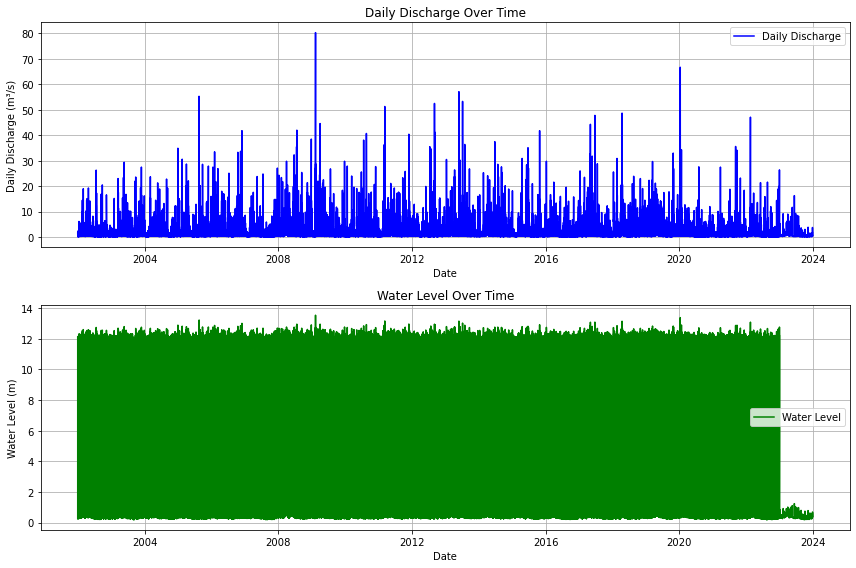

In [194]:
plt.figure(figsize=(12, 8))

# Subplot 1: Daily Discharge
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(flow_data_merged["Date"], flow_data_merged["daily_discharge"], label="Daily Discharge", color="blue")
plt.xlabel("Date")
plt.ylabel("Daily Discharge (m³/s)")
plt.title("Daily Discharge Over Time")
plt.grid(True)
plt.legend()

# Subplot 2: Water Level
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(flow_data_merged["Date"], flow_data_merged["water_level"], label="Water Level", color="green")
plt.xlabel("Date")
plt.ylabel("Water Level (m)")
plt.title("Water Level Over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


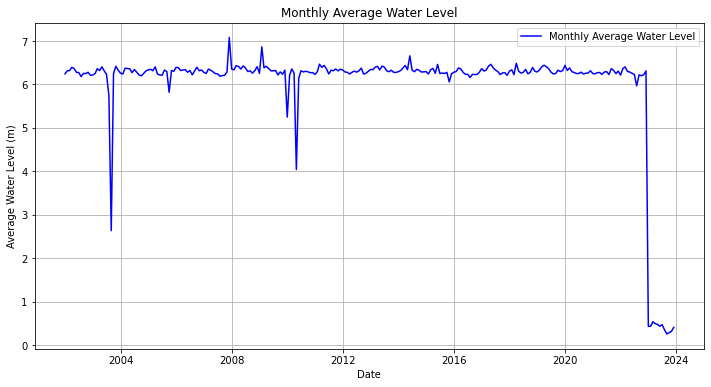

In [195]:
# Create a 'Year-Month' column for grouping
flow_data_merged["YearMonth"] = flow_data_merged["Date"].dt.to_period("M")

# Compute monthly averages
monthly_avg = flow_data_merged.groupby("YearMonth")["water_level"].mean().reset_index()

# Convert 'YearMonth' back to a datetime format for plotting
monthly_avg["YearMonth"] = monthly_avg["YearMonth"].dt.to_timestamp()

# Plot the monthly average
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["YearMonth"], monthly_avg["water_level"], color="blue", label="Monthly Average Water Level")
plt.xlabel("Date")
plt.ylabel("Average Water Level (m)")
plt.title("Monthly Average Water Level")
plt.grid(True)
plt.legend()
plt.show()


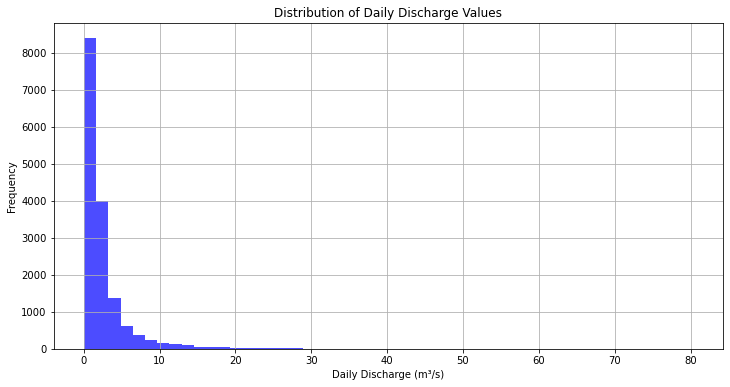

In [196]:
plt.figure(figsize=(12, 6))
plt.hist(flow_data_merged["daily_discharge"].dropna(), bins=50, color="blue", alpha=0.7)
plt.xlabel("Daily Discharge (m³/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Discharge Values")
plt.grid(True)
plt.show()


<Figure size 864x432 with 0 Axes>

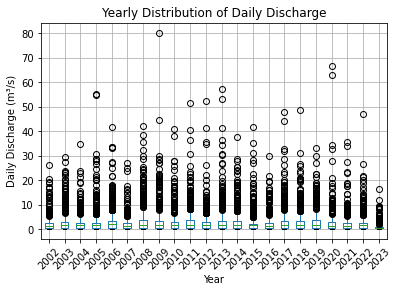

In [197]:
# Extract year for grouping
flow_data_merged["Year"] = flow_data_merged["Date"].dt.year

# Boxplot by year
plt.figure(figsize=(12, 6))
flow_data_merged.boxplot(column="daily_discharge", by="Year", grid=False)
plt.title("Yearly Distribution of Daily Discharge")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Daily Discharge (m³/s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


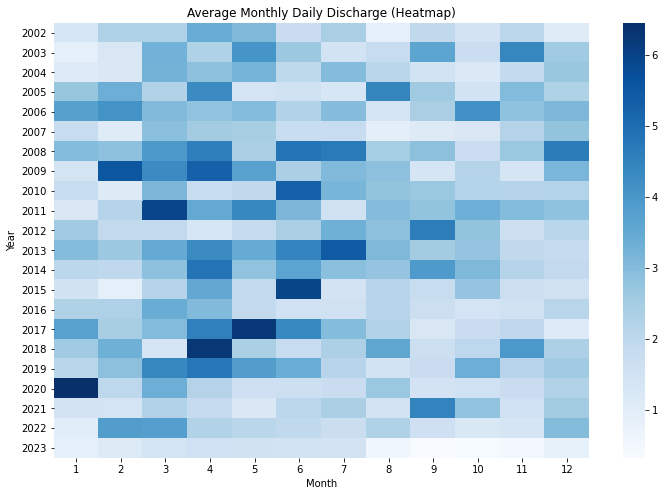

In [198]:


# Extract year and month
flow_data_merged["Year"] = flow_data_merged["Date"].dt.year
flow_data_merged["Month"] = flow_data_merged["Date"].dt.month

# Create a pivot table for heatmap
heatmap_data = flow_data_merged.pivot_table(index="Year", columns="Month", values="daily_discharge", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", annot=False)
plt.title("Average Monthly Daily Discharge (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [199]:
snowmelt_data = pd.read_csv('significant_snow_melt_events_after_freeze.csv')

In [200]:
# Ensure the date columns in both datasets are in datetime format
snowmelt_data["start_date"] = pd.to_datetime(snowmelt_data["start_date"])
snowmelt_data["end_date"] = pd.to_datetime(snowmelt_data["end_date"])
flow_data_merged["Date"] = pd.to_datetime(flow_data_merged["Date"])

# Add a column indicating whether a date falls within a snowmelt event
flow_data_merged["snowmelt_event"] = flow_data_merged["Date"].apply(
    lambda x: any((x >= start and x <= end) for start, end in zip(snowmelt_data["start_date"], snowmelt_data["end_date"]))
)


In [205]:
# Filter data for snowmelt and non-snowmelt periods
snowmelt_data = flow_data_merged[flow_data_merged["snowmelt_event"] == True]
non_snowmelt_data = flow_data_merged[flow_data_merged["snowmelt_event"] == False]

# Compute summary statistics
print("Snowmelt Period Statistics:")
print(snowmelt_data[["daily_discharge", "water_level"]].describe())

print("\nNon-Snowmelt Period Statistics:")
print(non_snowmelt_data[["daily_discharge", "water_level"]].describe())


Snowmelt Period Statistics:
       daily_discharge   water_level
count     11684.000000  11616.000000
mean          2.709326      6.134863
std           4.244715      5.908261
min           0.064000      0.199000
25%           0.406000      0.339000
50%           1.550000      0.853500
75%           3.040000     12.171000
max          80.300000     13.541000

Non-Snowmelt Period Statistics:
       daily_discharge  water_level
count      4021.000000  4007.000000
mean          2.147509     6.184917
std           3.471583     5.905409
min           0.086000     0.209000
25%           0.370000     0.346000
50%           1.480000     0.873000
75%           2.520000    12.157000
max          66.700000    13.385000


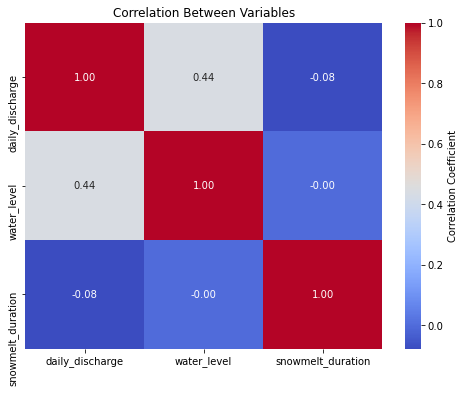

In [208]:
# Select relevant columns for correlation
correlation_data = flow_data_merged[["daily_discharge", "water_level", "snowmelt_duration"]].dropna()

# Compute correlation
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Correlation Coefficient"})
plt.title("Correlation Between Variables")
plt.show()


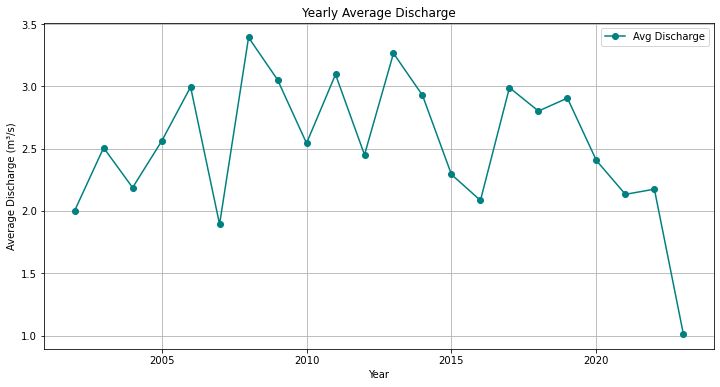

In [210]:
# Aggregate by year
yearly_discharge = flow_data_merged.groupby(flow_data_merged["Date"].dt.year)["daily_discharge"].mean().reset_index()
yearly_discharge.columns = ["Year", "Avg Discharge"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_discharge["Year"], yearly_discharge["Avg Discharge"], color="teal", marker="o", label="Avg Discharge")
plt.xlabel("Year")
plt.ylabel("Average Discharge (m³/s)")
plt.title("Yearly Average Discharge")
plt.grid(True)
plt.legend()
plt.show()
